In [64]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

16번 참가자 Food log 날짜가 범위에서 벗어남.  
  
덱스콤 실제 데이터 범위.  
2020-07-16 10:43:25  
2020-07-24 10:18:05  
  
Food Log  
2020-02-21 06:30:00  
2020-02-28 08:00:00  


2020-07-16부터 시작하는 범위로 이동할지,  
2020-07-17부터 시작하는 범위로 이동할지 판단  
-> 2020-07-17로 이동하는 것이 조금 더 말이 되는 것으로 판단  

In [65]:
fl_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/016/Food_Log_016.csv')

fl_df['date']=pd.to_datetime(fl_df['date'])
fl_df['time_begin']=pd.to_datetime(fl_df['time_begin'])

In [66]:
new_start = pd.Timestamp("2020-07-17 06:30:00")
old_start = pd.Timestamp("2020-02-21 06:30:00")

# 시간 차이 계산
time_difference = new_start - old_start

# 시간 범위 조정
fl_df['time_begin'] = fl_df['time_begin'] + time_difference

In [67]:
dexcom_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/016/Dexcom_016.csv')
dexcom_df.drop(dexcom_df.loc[:11].index, inplace=True)
dexcom_df.rename(columns = {'Timestamp (YYYY-MM-DDThh:mm:ss)': 'datetime'}, inplace = True)
dexcom_df['datetime']=pd.to_datetime(dexcom_df['datetime'])

In [68]:
dexcom_df.iloc[0]['datetime']

Timestamp('2020-07-16 10:48:24')

## 2020-07-16

Index                                        13
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     134.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)          8400.0
Name: 2020-07-16 10:48:24, dtype: object


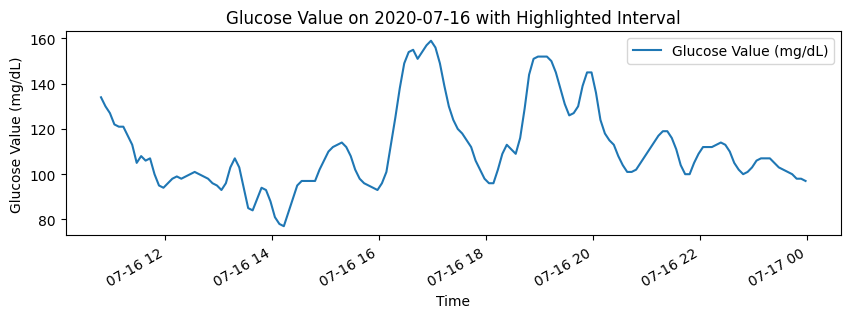

In [69]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-07-16 00:00:00') & (dexcom_df['datetime'] <= '2020-07-16 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-07-16 00:00:00') & (fl_df['time_begin'] <= '2020-07-16 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    print(start_time)
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-07-16 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-07-17

Index                                       172
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                      97.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)         56099.0
Name: 2020-07-17 00:03:24, dtype: object
2020-07-17 06:30:00
2020-07-17 06:30:00
2020-07-17 08:30:00
2020-07-17 13:15:00
2020-07-17 13:15:00
2020-07-17 13:15:00
2020-07-17 16:30:00
2020-07-17 16:30:00
2020-07-17 19:30:00
2020-07-17 19:30:00


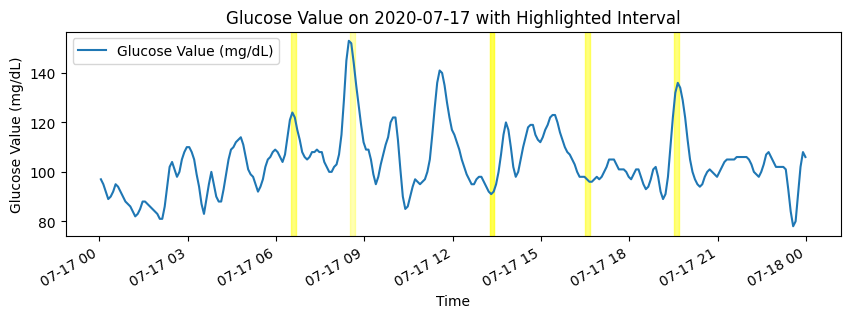

In [70]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-07-17 00:00:00') & (dexcom_df['datetime'] <= '2020-07-17 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-07-17 00:00:00') & (fl_df['time_begin'] <= '2020-07-17 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    print(start_time)
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-07-17 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-07-18

Index                                       460
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     104.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        142496.0
Name: 2020-07-18 00:03:21, dtype: object
2020-07-18 08:00:00
2020-07-18 12:45:00
2020-07-18 12:45:00
2020-07-18 12:45:00


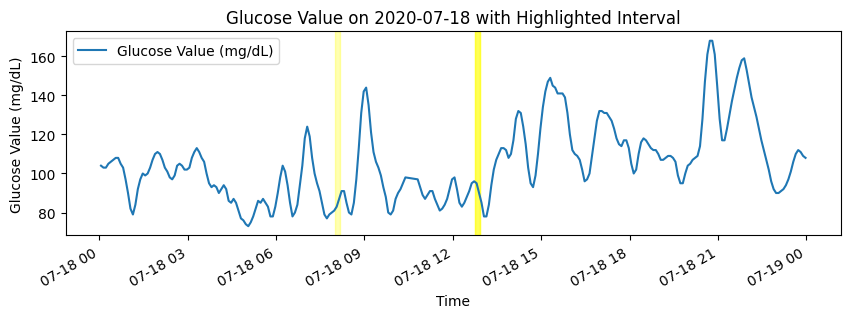

In [71]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-07-18 00:00:00') & (dexcom_df['datetime'] <= '2020-07-18 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-07-18 00:00:00') & (fl_df['time_begin'] <= '2020-07-18 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    print(start_time)
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-07-18 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-07-19

Index                                       744
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     112.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        228893.0
Name: 2020-07-19 00:03:19, dtype: object
2020-07-19 08:00:00
2020-07-19 10:00:00
2020-07-19 10:00:00
2020-07-19 10:00:00
2020-07-19 11:00:00
2020-07-19 11:00:00
2020-07-19 11:00:00
2020-07-19 18:00:00
2020-07-19 18:00:00


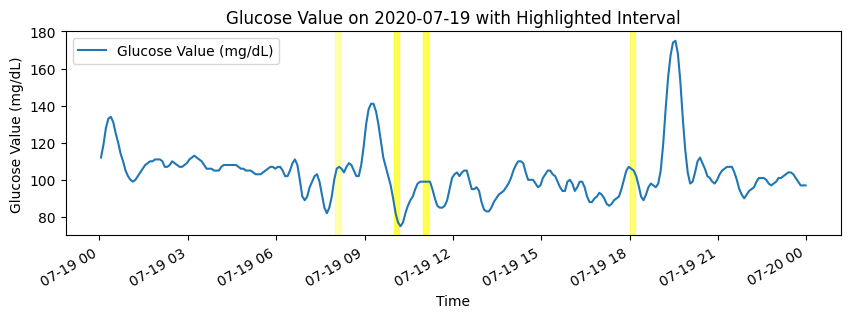

In [72]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-07-19 00:00:00') & (dexcom_df['datetime'] <= '2020-07-19 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-07-19 00:00:00') & (fl_df['time_begin'] <= '2020-07-19 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    print(start_time)
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-07-19 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-07-20

Index                                      1032
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                      97.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        315290.0
Name: 2020-07-20 00:03:17, dtype: object
2020-07-20 08:00:00
2020-07-20 19:30:00
2020-07-20 19:30:00


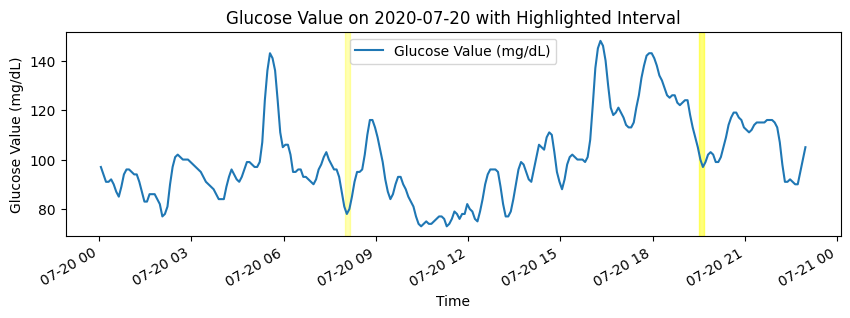

In [73]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-07-20 00:00:00') & (dexcom_df['datetime'] <= '2020-07-20 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-07-20 00:00:00') & (fl_df['time_begin'] <= '2020-07-20 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    print(start_time)
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-07-20 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-07-21

Index                                      1308
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     116.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        403787.0
Name: 2020-07-21 00:38:15, dtype: object
2020-07-21 06:30:00
2020-07-21 08:00:00
2020-07-21 08:00:00
2020-07-21 12:00:00
2020-07-21 17:00:00
2020-07-21 20:00:00
2020-07-21 20:00:00


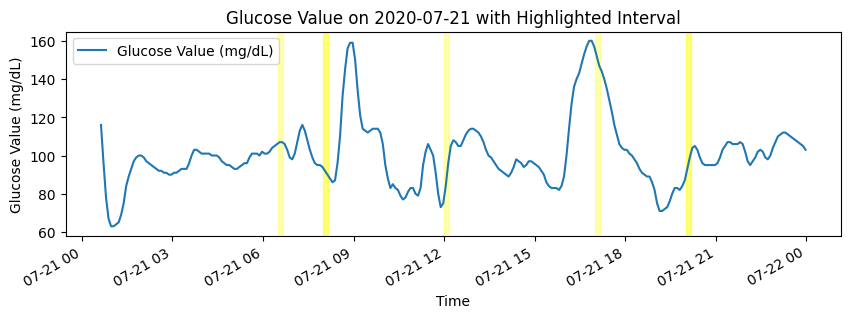

In [74]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-07-21 00:00:00') & (dexcom_df['datetime'] <= '2020-07-21 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-07-21 00:00:00') & (fl_df['time_begin'] <= '2020-07-21 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    print(start_time)
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-07-21 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-07-22

Index                                      1589
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     100.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        488084.0
Name: 2020-07-22 00:03:12, dtype: object
2020-07-22 09:30:00
2020-07-22 10:15:00
2020-07-22 10:15:00
2020-07-22 18:30:00
2020-07-22 18:30:00
2020-07-22 18:30:00
2020-07-22 18:30:00
2020-07-22 18:30:00


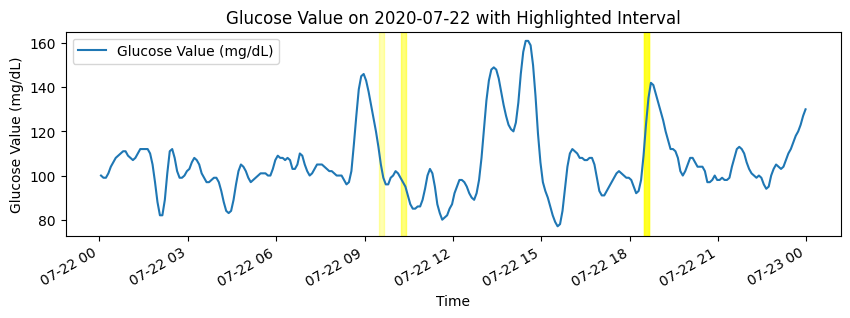

In [75]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-07-22 00:00:00') & (dexcom_df['datetime'] <= '2020-07-22 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-07-22 00:00:00') & (fl_df['time_begin'] <= '2020-07-22 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    print(start_time)
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-07-22 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-07-23

Index                                      1877
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     130.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        574482.0
Name: 2020-07-23 00:03:10, dtype: object
2020-07-23 10:30:00
2020-07-23 11:30:00
2020-07-23 11:30:00


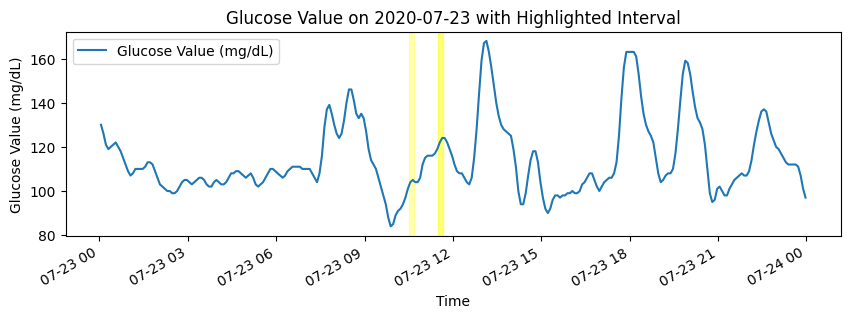

In [76]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-07-23 00:00:00') & (dexcom_df['datetime'] <= '2020-07-23 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-07-23 00:00:00') & (fl_df['time_begin'] <= '2020-07-23 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    print(start_time)
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-07-23 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-07-24

Index                                      2165
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                      95.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        660878.0
Name: 2020-07-24 00:03:07, dtype: object
2020-07-24 08:00:00


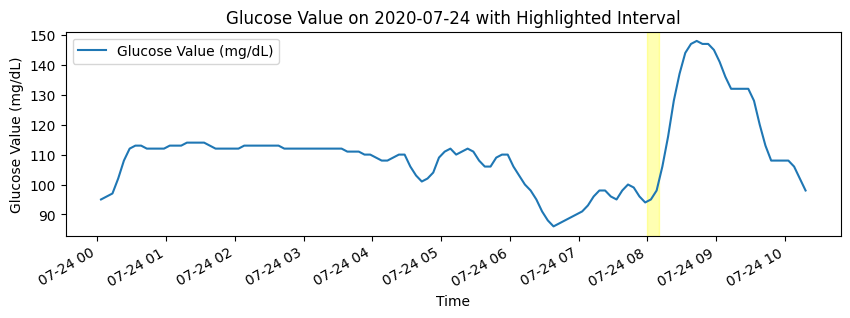

In [77]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-07-24 00:00:00') & (dexcom_df['datetime'] <= '2020-07-24 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-07-24 00:00:00') & (fl_df['time_begin'] <= '2020-07-24 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    print(start_time)
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-07-24 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()